# import Libraries

In [1]:
import pandas as pd
import json
import requests
import glob
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [3]:
flat_data = pd.concat([pd.read_csv(f) for f in glob.glob("./data/*.csv")], ignore_index=True)

In [4]:
# finding shape in dataset rows and coulmns 
flat_data.shape

(916063, 11)

In [5]:
flat_data.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [6]:
# checking information
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916063 entries, 0 to 916062
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                916063 non-null  object 
 1   town                 916063 non-null  object 
 2   flat_type            916063 non-null  object 
 3   block                916063 non-null  object 
 4   street_name          916063 non-null  object 
 5   storey_range         916063 non-null  object 
 6   floor_area_sqm       916063 non-null  float64
 7   flat_model           916063 non-null  object 
 8   lease_commence_date  916063 non-null  int64  
 9   resale_price         916063 non-null  float64
 10  remaining_lease      207013 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ MB


In [7]:
flat_data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [8]:
# Handling Drop Null Values..
flat_data = flat_data.dropna()

In [9]:
flat_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [10]:
flat_data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,207013.000000,207013.000000,2.070130e+05
mean,97.230044,1994.982673,4.815933e+05
std,24.055071,13.580627,1.657020e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.600000e+05
50%,94.000000,1995.000000,4.500000e+05
75%,112.000000,2004.000000,5.700000e+05
max,280.000000,2022.000000,1.500000e+06


In [11]:
# Checking the 
flat_data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [12]:
list_of_mrt = ['Jurong East MRT Station','Bukit Batok MRT Station','Bukit Gombak MRT Station','Choa Chu Kang MRT Station','Yew Tee MRT Station','Kranji MRT Station','Marsiling MRT Station','Woodlands MRT Station','Admiralty MRT Station',
    'Sembawang MRT Station','Canberra MRT Station','Yishun MRT Station','Khatib MRT Station','Yio Chu Kang MRT Station','Ang Mo Kio MRT Station','Bishan MRT Station','Braddell MRT Station','Toa Payoh MRT Station',
    'Novena MRT Station','Newton MRT Station','Orchard MRT Station','Somerset MRT Station','Dhoby Ghaut MRT Station','City Hall MRT Station','Raffles Place MRT Station','Marina Bay MRT Station','Marina South Pier MRT Station',
    'Pasir Ris MRT Station','Tampines MRT Station','Simei MRT Station','Tanah Merah MRT Station','Bedok MRT Station','Kembangan MRT Station','Eunos MRT Station','Paya Lebar MRT Station','Aljunied MRT Station','Kallang MRT Station',
    'Lavender MRT Station','Bugis MRT Station','Tanjong Pagar MRT Station','Outram Park MRT Station','Tiong Bahru MRT Station','Redhill MRT Station','Queenstown MRT Station','Commonwealth MRT Station','Buona Vista MRT Station','Dover MRT Station','Clementi MRT Station',
    'Chinese Garden MRT Station','Lakeside MRT Station','Boon Lay MRT Station','Pioneer MRT Station','Joo Koon MRT Station','Gul Circle MRT Station','Tuas Crescent MRT Station','Tuas West Road MRT Station','Tuas Link MRT Station','Expo MRT Station',
    'Changi Airport MRT Station','HarbourFront MRT Station','Chinatown MRT Station','Clarke Quay MRT Station','Little India MRT Station','Farrer Park MRT Station','Boon Keng MRT Station','Potong Pasir MRT Station','Woodleigh MRT Station','Serangoon MRT Station',
    'Kovan MRT Station','Hougang MRT Station','Buangkok MRT Station','Sengkang MRT Station','Punggol MRT Station','Bras Basah MRT Station','Esplanade MRT Station','Promenade MRT Station','Nicoll Highway MRT Station','Stadium MRT Station','Mountbatten MRT Station',
    'Dakota MRT Station','MacPherson MRT Station','Tai Seng MRT Station','Bartley MRT Station','Lorong Chuan MRT Station','Marymount MRT Station','Caldecott MRT Station','Botanic Gardens MRT Station','Farrer Road MRT Station','Holland Village MRT Station','one-north MRT Station',
    'Kent Ridge MRT Station','Haw Par Villa MRT Station','Pasir Panjang MRT Station','Labrador Park MRT Station','Telok Blangah MRT Station','Bayfront MRT Station','Bukit Panjang MRT Station',
    'Cashew MRT Station','Hillview MRT Station','Beauty World MRT Station','King Albert Park MRT Station','Sixth Avenue MRT Station','Tan Kah Kee MRT Station','Stevens MRT Station','Rochor MRT Station','Downtown MRT Station',
    'Telok Ayer MRT Station','Fort Canning MRT Station','Bencoolen MRT Station','Jalan Besar MRT Station','Bendemeer MRT Station','Geylang Bahru MRT Station','Mattar MRT Station','Ubi MRT Station','Kaki Bukit MRT Station',
    'Bedok North MRT Station','Bedok Reservoir MRT Station','Tampines West MRT Station','Tampines East MRT Station','Upper Changi MRT Station','Woodlands North MRT Station','Woodlands South MRT Station'
]

In [13]:
len(list_of_mrt)

122

In [15]:
mrt_lat = [ 1.33329506563598,1.3487108105756, 1.35861159094192,1.38536316540225,1.39757979021386, 1.42508698073648,1.43252114855026, 1.43605761708128, 1.44058856161847, 1.44905082158502, 1.44307664075699, 
            1.42944308477331, 1.41738337009565, 1.38168259989517, 1.36993284962264, 1.35131580146658, 1.3404690010277, 1.33259672794159, 1.32044079120154, 1.3123189224097, 1.30242224836722, 1.30026416739006, 
            1.29868872290409, 1.29298990728295, 1.28393326207164, 1.27642735476716, 1.27102703612006, 1.37304331635804, 1.34551530560119, 1.34319707851829, 1.32718729074675, 1.32040148729112, 1.3210381335934, 
            1.31978354916088, 1.31719911972353, 1.3164326118157, 1.31148890998818, 1.30737781747063, 1.30046508509717, 1.27656131737246, 1.27973970679335, 1.28610253588403, 1.28963453412887,1.29455085184931, 
            1.30250199924325, 1.3072237082044, 1.31140529320963, 1.31511625277378, 1.34235282081401, 1.34425911493819, 1.33861033900695, 1.33758701106708, 1.3277170408447, 1.31947090075208, 1.32102695598684, 1.32998504653102, 
            1.34088242451105, 1.33538252614956, 1.35747897447692, 1.26538938374901, 1.28422391919085, 1.28838602407588, 1.30724381608438, 1.31190557325774, 1.31959679168634, 1.3318797140041, 1.33919004519388, 
            1.35063361526525, 1.36017917065237, 1.37129226620797, 1.38287001971672, 1.39169462601522, 1.41492733388605, 1.2967526221395, 1.2936577245386, 1.29399798636232, 1.29976684675139, 
            1.3028124684707, 1.30620190525331, 1.30854798388121, 1.32615024457361, 1.33514564170352, 1.34250117805245, 1.35153128621585, 1.348707263451, 1.33724561271722, 1.32211373558877, 
            1.31743915158967, 1.31226422601049, 1.29973599364922,1.29353698622126,1.28260725045254,1.27621352233766, 1.27225417749656, 1.27070647717762, 1.28187378879209, 1.37900211641036,1.36981544925552,
            1.36234486803558,1.34122317558549, 1.335893496278, 1.33096058134451, 1.32639224146351, 1.32006555750626,1.30385218527656, 1.27944638178916, 1.28206894769394, 1.29248194822996, 1.29891843369422, 
            1.3051713878069, 1.31367252847691, 1.32130110228321, 1.32687671501334, 1.32997425973974, 1.33496735995428, 1.33474211664091, 1.33660782955099, 1.3456336579777, 1.35619148271544,
            1.34173977444995,1.44778217342648, 1.42748811362716]

In [16]:
len(mrt_lat)

122

In [17]:
mrt_long = [103.742153884191,103.749334517338,103.751790910733,103.744370779756,103.747459490883,103.762137459497,103.774074641403,103.787938777173,103.800990519771,103.820046140211,103.829702590959,
            103.835005047246,103.832979908243,103.844991053696,103.849558091776,103.84914026532,103.846799083148,103.847577286075,103.843825618748,103.837984594021,103.823868523249,103.839085753124,
            103.846179896647,103.852542630611,103.851463066756,103.854597776754,103.862447515736,103.949284527763,103.938436971222,103.953377214378,103.946348600798,103.957183823478,103.912947930851,103.903225807255,
            103.8923648823,103.882906044385,103.871386541754,103.862767633888,103.855706730933,103.845725186759,103.839513521005,103.827445112691,103.81674097205,103.806077155982,103.798228523336,
            103.790253514502,103.778637841909,103.765191452888,103.732596738363,103.720949087456,103.706084900902,103.697321608474,103.678374996165,103.660530461345,103.649078235627,103.639616648771,
            103.636991425128,103.962374747451,103.98788356959,103.821530157095,103.845143798953,103.846555209694,103.849841614124,103.853477716509,103.861750715496,103.869057877586,103.87081830915,
            103.872771660431,103.885064856353,103.892380513029,103.893122569706,103.895484694279,103.910166388177,103.850918752694,103.855081226245,103.860350000188,103.86363696572,103.875337711089,
            103.882528081052,103.889064718377,103.889298600376,103.888336109832,103.880177899184,103.864812169514,103.839423132332,103.840161782075,103.814984510627,103.807379214161,103.796470444998,
            103.787472120061,103.784572366867,103.781795517386,103.791350313288,103.802631578766,103.809761611219,103.859079764874,103.761535114929,103.76443921414,103.767418254007,103.775794285083,
            103.783235863233,103.796969279733,103.806548201692,103.826024401924,103.852769428884,103.852840829581,103.848648781083,103.844331362465,103.850353762717,103.855295713435,103.862977620945,
            103.871622627142,103.883247509542,103.899226655439,103.908459338046,103.91797832995,103.932234623286,103.938492495285,103.9546344625,103.961472788634,103.7851355073,103.792729941333]

In [18]:
len(mrt_long)

122

In [19]:
mrt_location = pd.DataFrame({'MRT': list_of_mrt,'latitude':mrt_lat,'longitude':mrt_long})

In [20]:
mrt_location.head()

,MRT,latitude,longitude
0,Jurong East MRT Station,1.333295,103.742154
1,Bukit Batok MRT Station,1.348711,103.749335
2,Bukit Gombak MRT Station,1.358612,103.751791
3,Choa Chu Kang MRT Station,1.385363,103.744371
4,Yew Tee MRT Station,1.397580,103.747459


In [21]:
mrt_location.shape

(122, 3)

In [23]:
mrt_location.to_csv('Singapore_MRT.csv',index=False)

In [24]:
flat_data.loc[:,'address'] = flat_data['block'] + " " + flat_data['street_name']

In [25]:
flat_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address
656847,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,174 ANG MO KIO AVE 4
656848,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,541 ANG MO KIO AVE 10
656849,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,163 ANG MO KIO AVE 4
656850,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,446 ANG MO KIO AVE 10
656851,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
863855,2024-01,YISHUN,5 ROOM,229,YISHUN ST 21,07 TO 09,121.0,Improved,1985,610088.0,60 years 06 months,229 YISHUN ST 21
863856,2024-01,YISHUN,5 ROOM,505C,YISHUN ST 51,04 TO 06,112.0,Improved,2016,640000.0,91 years 03 months,505C YISHUN ST 51
863857,2024-01,YISHUN,5 ROOM,513C,YISHUN ST 51,07 TO 09,113.0,Improved,2018,675000.0,93 years 03 months,513C YISHUN ST 51
863858,2024-01,YISHUN,5 ROOM,602,YISHUN ST 61,07 TO 09,121.0,Improved,1987,688000.0,62 years 05 months,602 YISHUN ST 61


In [26]:
address_list = flat_data['address'].unique()

In [27]:
address_list

array(['174 ANG MO KIO AVE 4', '541 ANG MO KIO AVE 10',
       '163 ANG MO KIO AVE 4', ..., '460A BT BATOK WEST AVE 9',
       '439C BT BATOK WEST AVE 8', '823 YISHUN ST 81'], dtype=object)

In [28]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for i in range(len(address_list)):
    query_address = address_list[i]    # # Takes the current address from the address_list for querying
    query_string='https://www.onemap.gov.sg/api/common/elastic/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'    # Constructs the API query URL with the current address
    resp = requests.get(query_string)    # Sends a GET request to the OneMap API with the constructed query URL.
    data_geo_location=json.loads(resp.content)    # Parses the JSON response from the OneMap API.
    if data_geo_location['found'] != 0:    #  Checks if the API response indicates that a location was found.
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])   # Append the values to the list
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print ("No Results")

174 ANG MO KIO AVE 4 ,Lat: 1.37509746867904 Long: 103.83761896123
541 ANG MO KIO AVE 10 ,Lat: 1.37392239168826 Long: 103.855621371068
163 ANG MO KIO AVE 4 ,Lat: 1.37354853919927 Long: 103.838176471398
446 ANG MO KIO AVE 10 ,Lat: 1.36776095130953 Long: 103.855357145908
557 ANG MO KIO AVE 10 ,Lat: 1.3716257020332 Long: 103.857736107527
603 ANG MO KIO AVE 5 ,Lat: 1.38020079047279 Long: 103.83575571651
709 ANG MO KIO AVE 8 ,Lat: 1.37113720765377 Long: 103.847662320064
333 ANG MO KIO AVE 1 ,Lat: 1.3613425564061 Long: 103.851698621454
109 ANG MO KIO AVE 4 ,Lat: 1.37009653758337 Long: 103.837687775294
564 ANG MO KIO AVE 3 ,Lat: 1.36984837555524 Long: 103.859404131956
218 ANG MO KIO AVE 1 ,Lat: 1.36511907555698 Long: 103.841742483384
556 ANG MO KIO AVE 10 ,Lat: 1.37203236308683 Long: 103.857625375797
156 ANG MO KIO AVE 4 ,Lat: 1.37549519574964 Long: 103.839947470774
471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
434 ANG MO KIO AVE 10 ,Lat: 1.3678915069194 Long: 103.8534550

In [29]:
!pip install geopy

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.3 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
flat_coordinates = pd.DataFrame({'latitude':latitude,'longitude':longitude,'blk_no':blk_no,
                                 'road_name':road_name,'postal_code':postal_code,'address':address})


In [31]:
len(flat_coordinates)

9557

In [32]:
list_of_latitude = flat_coordinates['latitude']
list_of_logitude = flat_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']

In [33]:
list_of_coordinates = []
list_of_mrt_coordinates = []
for lat, long in zip(list_of_latitude,list_of_logitude):
    list_of_coordinates.append((lat,long))
for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat,long))

In [37]:
from geopy.distance import geodesic
list_of_dist_mrt = []
min_dist_mrt = []
for origin in list_of_coordinates:
    for destination in range(0,len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [38]:
cbd_dist = []
for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830,103.8513)).meters)

In [39]:
flat_coordinates['cbd_dist'] = cbd_dist
flat_coordinates['min_dist_mrt'] = min_dist_mrt

In [40]:
flat_coordinates

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.37509746867904,103.83761896123,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897
1,1.37392239168826,103.855621371068,541,ANG MO KIO AVENUE 10,560541,541 ANG MO KIO AVE 10,10065.227934,806.176499
2,1.37354853919927,103.838176471398,163,ANG MO KIO AVENUE 4,560163,163 ANG MO KIO AVE 4,10118.355593,1176.477427
3,1.36776095130953,103.855357145908,446,ANG MO KIO AVENUE 10,560446,446 ANG MO KIO AVE 10,9383.300907,688.600961
4,1.3716257020332,103.857736107527,557,ANG MO KIO AVENUE 10,560557,557 ANG MO KIO AVE 10,9825.917255,929.164159
...,...,...,...,...,...,...,...,...
9552,1.332464536405,103.855237512058,264,TOA PAYOH EAST,310264,264 TOA PAYOH EAST,5487.060026,852.628695
9553,1.42438879653642,103.852083098516,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601
9554,1.35426046045608,103.739309747692,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306
9555,1.35762861295926,103.738857524407,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413


In [41]:
flat_coordinates.to_csv('flat_coordinates.csv',index=False)

In [43]:
flat_coordinates_1 = pd.read_csv('flat_coordinates.csv')

In [44]:
flat_coordinates_1

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897
1,1.373922,103.855621,541,ANG MO KIO AVENUE 10,560541,541 ANG MO KIO AVE 10,10065.227934,806.176499
2,1.373549,103.838176,163,ANG MO KIO AVENUE 4,560163,163 ANG MO KIO AVE 4,10118.355593,1176.477427
3,1.367761,103.855357,446,ANG MO KIO AVENUE 10,560446,446 ANG MO KIO AVE 10,9383.300907,688.600961
4,1.371626,103.857736,557,ANG MO KIO AVENUE 10,560557,557 ANG MO KIO AVE 10,9825.917255,929.164159
...,...,...,...,...,...,...,...,...
9552,1.332465,103.855238,264,TOA PAYOH EAST,310264,264 TOA PAYOH EAST,5487.060026,852.628695
9553,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601
9554,1.354260,103.739310,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306
9555,1.357629,103.738858,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413


In [45]:
flat_new = flat_coordinates_1.merge(flat_data,on="address",how = 'outer')

In [46]:
flat_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207008,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2023-12,YISHUN,2 ROOM,469B,YISHUN ST 43,10 TO 12,47.0,Model A,2019,346000.0,95 years
207009,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2024-01,YISHUN,4 ROOM,469B,YISHUN ST 43,07 TO 09,93.0,Model A,2019,555000.0,94 years 11 months
207010,1.354260,103.739310,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306,2024-01,BUKIT BATOK,4 ROOM,460A,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,559500.0,95 years 05 months
207011,1.357629,103.738858,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413,2024-01,BUKIT BATOK,5 ROOM,439C,BT BATOK WEST AVE 8,07 TO 09,113.0,Improved,2020,793000.0,95 years 02 months


In [47]:
flat_new['resale_price'] = flat_new['resale_price'].astype('float')
flat_new['floor_area_sqm'] = flat_new['floor_area_sqm'].astype('float')
flat_new['lease_commence_date'] = flat_new['lease_commence_date'].astype('int64')
flat_new['lease_remain_years'] = 99 - (2023 - flat_new['lease_commence_date'])
flat_new.dropna(inplace=True)

In [48]:
flat_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207008,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2023-12,YISHUN,2 ROOM,469B,YISHUN ST 43,10 TO 12,47.0,Model A,2019,346000.0,95 years,95
207009,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2024-01,YISHUN,4 ROOM,469B,YISHUN ST 43,07 TO 09,93.0,Model A,2019,555000.0,94 years 11 months,95
207010,1.354260,103.739310,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306,2024-01,BUKIT BATOK,4 ROOM,460A,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,559500.0,95 years 05 months,96
207011,1.357629,103.738858,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413,2024-01,BUKIT BATOK,5 ROOM,439C,BT BATOK WEST AVE 8,07 TO 09,113.0,Improved,2020,793000.0,95 years 02 months,96


In [4]:
flat_new.to_csv('combined.csv',index=False)

In [3]:
flat_new_1 = pd.read_csv('combined.csv')

In [5]:
flat_new_1

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206996,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2023-12,YISHUN,2 ROOM,469B,YISHUN ST 43,10 TO 12,47.0,Model A,2019,346000.0,95 years,95
206997,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2024-01,YISHUN,4 ROOM,469B,YISHUN ST 43,07 TO 09,93.0,Model A,2019,555000.0,94 years 11 months,95
206998,1.354260,103.739310,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306,2024-01,BUKIT BATOK,4 ROOM,460A,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,559500.0,95 years 05 months,96
206999,1.357629,103.738858,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413,2024-01,BUKIT BATOK,5 ROOM,439C,BT BATOK WEST AVE 8,07 TO 09,113.0,Improved,2020,793000.0,95 years 02 months,96


In [52]:
flat_new['lease_commence_date'].unique()

array([1986, 1981, 1980, 1979, 1978, 1985, 1976, 1977, 2002, 1993, 1996,
       2006, 2003, 1982, 1974, 2010, 1987, 1984, 2000, 1989, 1995, 1992,
       1988, 1998, 1990, 1983, 2004, 1997, 2005, 1969, 1970, 1971, 1973,
       2009, 1999, 2001, 2008, 2007, 1975, 2011, 1968, 1967, 1972, 1991,
       2012, 1994, 1966, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [53]:
flat_new['lease_commence_date'].min()

1966

In [54]:
flat_new['lease_commence_date'].max()

2022

In [55]:
flat_new['block'].unique()

array(['174', '541', '163', ..., '605A', '605C', '460A'], dtype=object)

In [56]:
flat_new['street_name'].unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3',
       'ANG MO KIO AVE 6', 'ANG MO KIO ST 52', 'ANG MO KIO ST 21',
       'ANG MO KIO ST 31', 'BEDOK RESERVOIR RD', 'BEDOK STH RD',
       'BEDOK NTH ST 3', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'NEW UPP CHANGI RD', 'CHAI CHEE ST', 'BEDOK NTH ST 1',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 2', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 3', 'BEDOK STH AVE 1', 'BEDOK CTRL',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'BEDOK RESERVOIR VIEW',
       'CHAI CHEE RD', 'JLN TENAGA', 'BEDOK STH AVE 3', 'LENGKONG TIGA',
       'SHUNFU RD', 'BISHAN ST 24', 'BISHAN ST 12', 'BISHAN ST 22',
       'BISHAN ST 13', 'BISHAN ST 23', 'BRIGHT HILL DR', 'SIN MING AVE',
       'BT BATOK ST 52', 'BT BATOK WEST AVE 4', 'BT BATOK WEST AVE 2',
       'BT BATOK EAST AVE 4', 'BT BATOK EAST AVE 3', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 8', 'BT BATOK ST 

In [57]:
flat_new['blk_no'].unique()

array(['174', '541', '163', ..., '605A', '605C', '460A'], dtype=object)

In [58]:
street_name = flat_new['street_name'].unique()
flat_new_3 = pd.DataFrame({'street_name':street_name})
flat_new_3.to_csv('street_name.csv',index=False,header=['street_name'])

In [59]:
flat_new_5 = pd.read_csv('street_name.csv')

In [60]:
flat_new_5

,street_name
0,ANG MO KIO AVE 4
1,ANG MO KIO AVE 10
2,ANG MO KIO AVE 5
3,ANG MO KIO AVE 8
4,ANG MO KIO AVE 1
...,...
562,BT BATOK WEST AVE 9
563,MARINE PARADE CTRL
564,MARGARET DR
565,TAMPINES ST 61


In [61]:
block = flat_new['block'].unique()
flat_new_7 = pd.DataFrame({'block':block})
flat_new_7.to_csv('block_no.csv',index=False,header=['block'])

In [62]:
flat_new___ = pd.read_csv('block_no.csv')

In [63]:
flat_new___

,block
0,174
1,541
2,163
3,446
4,557
...,...
2694,462D
2695,605B
2696,605A
2697,605C


In [6]:
flat_df = pd.read_csv('combined.csv')

In [7]:
flat_df.head()

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62


In [8]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207001 entries, 0 to 207000
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             207001 non-null  float64
 1   longitude            207001 non-null  float64
 2   blk_no               207001 non-null  object 
 3   road_name            207001 non-null  object 
 4   postal_code          207001 non-null  int64  
 5   address              207001 non-null  object 
 6   cbd_dist             207001 non-null  float64
 7   min_dist_mrt         207001 non-null  float64
 8   month                207001 non-null  object 
 9   town                 207001 non-null  object 
 10  flat_type            207001 non-null  object 
 11  block                207001 non-null  object 
 12  street_name          207001 non-null  object 
 13  storey_range         207001 non-null  object 
 14  floor_area_sqm       207001 non-null  float64
 15  flat_model       

In [9]:
flat_df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [10]:
flat_df.shape

(207001, 20)

In [11]:
flat_df.describe()

,latitude,longitude,postal_code,cbd_dist,min_dist_mrt,floor_area_sqm,lease_commence_date,resale_price,lease_remain_years
count,207001.000000,207001.000000,207001.000000,207001.000000,207001.000000,207001.000000,207001.000000,2.070010e+05,207001.000000
mean,1.367410,103.841276,560032.902609,12431.470578,827.695947,97.229546,1994.982961,4.815968e+05,70.982961
std,0.042756,0.071419,190105.913528,4398.287913,462.004608,24.055667,13.580968,1.657052e+05,13.580968
min,1.270380,103.685228,50004.000000,592.121638,36.079525,31.000000,1966.000000,1.400000e+05,42.000000
25%,1.336853,103.778882,510158.000000,9688.670875,474.666770,82.000000,1984.000000,3.600000e+05,60.000000
50%,1.366824,103.846163,560546.000000,13338.400014,743.435035,94.000000,1995.000000,4.500000e+05,71.000000
75%,1.395402,103.899272,730034.000000,15459.885144,1099.241512,112.000000,2004.000000,5.700000e+05,80.000000
max,1.457071,103.987805,825195.000000,20225.103698,3496.402761,280.000000,2022.000000,1.500000e+06,98.000000


In [12]:
# minor data preprocessing for combined data
def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [13]:
flat_df['storey_median'] = flat_df['storey_range'].apply(lambda x: get_median(x))

In [14]:
flat_df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206996,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2023-12,YISHUN,...,469B,YISHUN ST 43,10 TO 12,47.0,Model A,2019,346000.0,95 years,95,11.0
206997,1.424389,103.852083,469B,YISHUN STREET 43,762469,469B YISHUN ST 43,15634.294384,1981.003601,2024-01,YISHUN,...,469B,YISHUN ST 43,07 TO 09,93.0,Model A,2019,555000.0,94 years 11 months,95,8.0
206998,1.354260,103.739310,460A,BUKIT BATOK WEST AVENUE 9,651460,460A BT BATOK WEST AVE 9,14745.342487,1273.275306,2024-01,BUKIT BATOK,...,460A,BT BATOK WEST AVE 9,04 TO 06,93.0,Model A,2020,559500.0,95 years 05 months,96,5.0
206999,1.357629,103.738858,439C,BUKIT BATOK WEST AVENUE 8,653439,439C BT BATOK WEST AVE 8,14989.660765,1443.434413,2024-01,BUKIT BATOK,...,439C,BT BATOK WEST AVE 8,07 TO 09,113.0,Improved,2020,793000.0,95 years 02 months,96,8.0


In [15]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207001 entries, 0 to 207000
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             207001 non-null  float64
 1   longitude            207001 non-null  float64
 2   blk_no               207001 non-null  object 
 3   road_name            207001 non-null  object 
 4   postal_code          207001 non-null  int64  
 5   address              207001 non-null  object 
 6   cbd_dist             207001 non-null  float64
 7   min_dist_mrt         207001 non-null  float64
 8   month                207001 non-null  object 
 9   town                 207001 non-null  object 
 10  flat_type            207001 non-null  object 
 11  block                207001 non-null  object 
 12  street_name          207001 non-null  object 
 13  storey_range         207001 non-null  object 
 14  floor_area_sqm       207001 non-null  float64
 15  flat_model       

In [16]:
scope_df = flat_df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]

In [17]:
# in duplicated so much is remove them..
scope_df.duplicated().sum()

6392

In [18]:
scope_df =scope_df.drop_duplicates()

In [19]:
# Re check the duplicated in flat is zero
scope_df.duplicated().sum()

0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

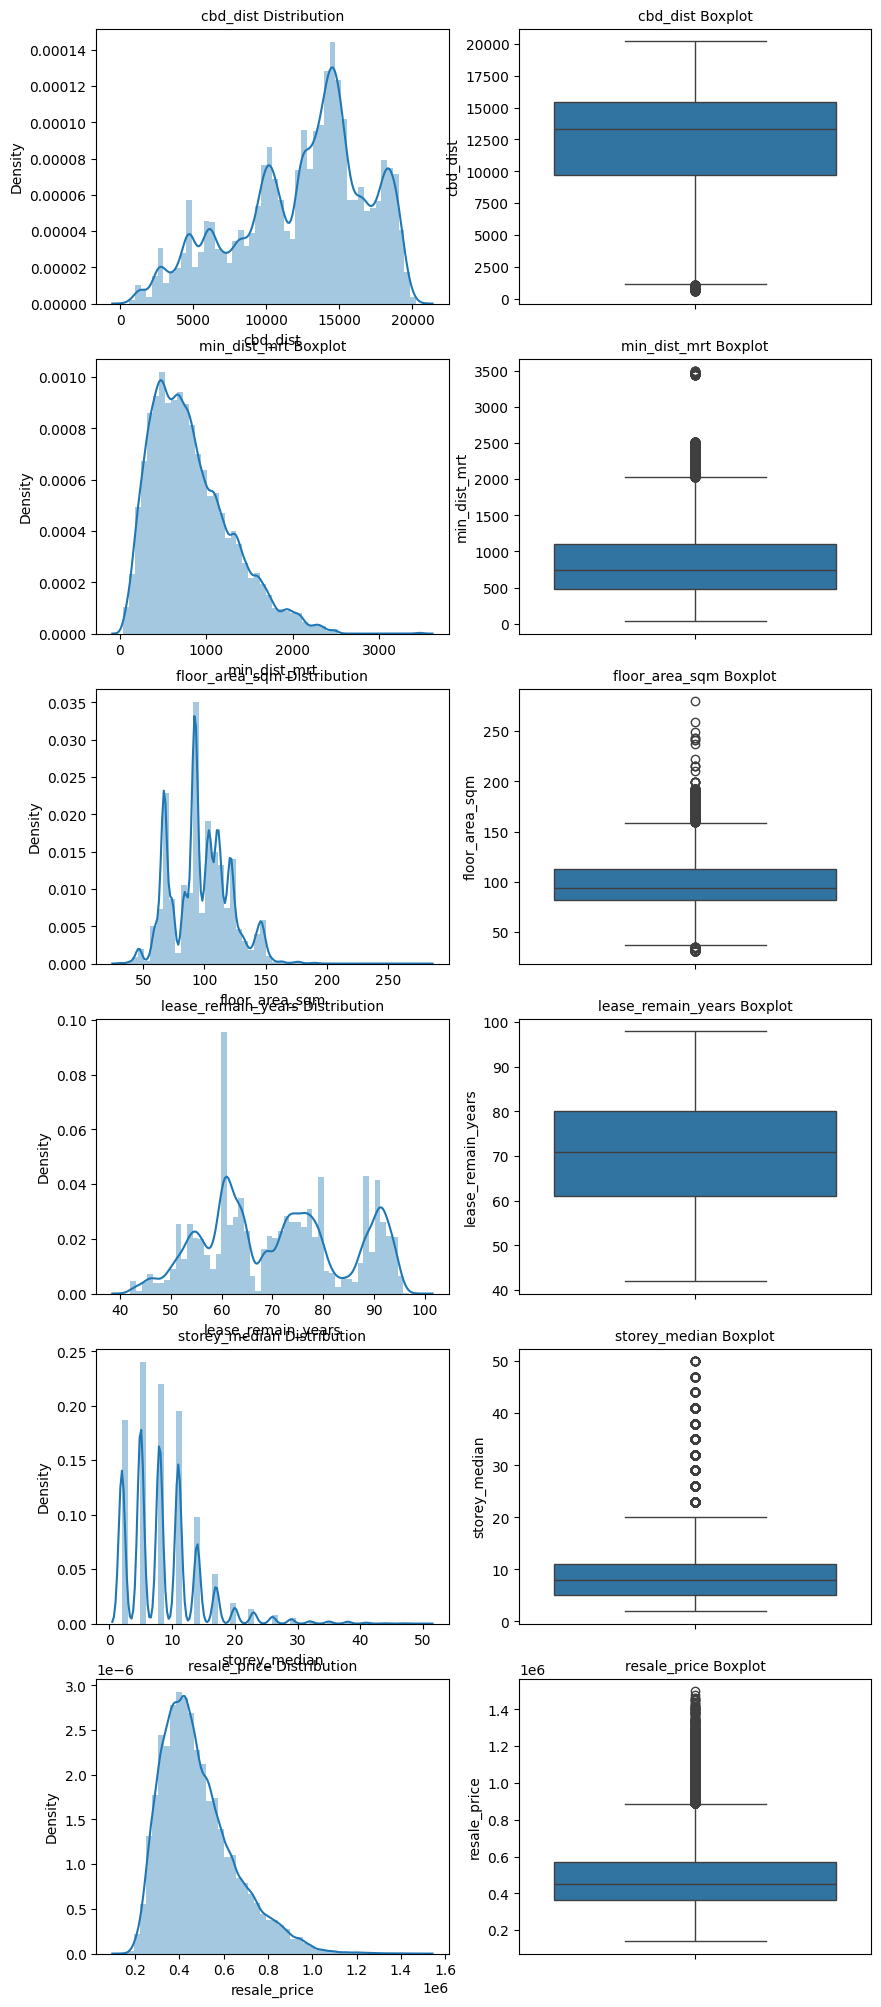

In [21]:
# checking the overfitting are underfitting in boxplot
fig,axes = plt.subplots(nrows =6,ncols =2)
fig.set_size_inches(10,25)
a = sns.distplot(scope_df['cbd_dist'],ax=axes[0][0])
a.set_title("cbd_dist Distribution",fontsize = 10)
a = sns.boxplot(scope_df['cbd_dist'],orient = 'v',ax = axes[0][1])
a.set_title("cbd_dist Boxplot",fontsize=10)

a = sns.distplot(scope_df['min_dist_mrt'],ax = axes[1][0])
a.set_title("min_dist_mrt Boxplot",fontsize=10)
a = sns.boxplot(scope_df['min_dist_mrt'],orient = 'v',ax=axes[1][1])
a.set_title("min_dist_mrt Boxplot",fontsize =10)

a = sns.distplot(scope_df['floor_area_sqm'],ax=axes[2][0])
a.set_title("floor_area_sqm Distribution",fontsize=10)
a = sns.boxplot(scope_df['floor_area_sqm'],orient ='v',ax= axes[2][1])
a.set_title("floor_area_sqm Boxplot",fontsize=10)

a = sns.distplot(scope_df['lease_remain_years'] , ax=axes[3][0])
a.set_title("lease_remain_years Distribution",fontsize=10)
a = sns.boxplot(scope_df['lease_remain_years'] , orient = "v" , ax=axes[3][1])
a.set_title("lease_remain_years Boxplot",fontsize=10)

a = sns.distplot(scope_df['storey_median'] , ax=axes[4][0])
a.set_title("storey_median Distribution",fontsize=10)
a = sns.boxplot(scope_df['storey_median'] , orient = "v" , ax=axes[4][1])
a.set_title("storey_median Boxplot",fontsize=10)

a = sns.distplot(scope_df['resale_price'] , ax=axes[5][0])
a.set_title("resale_price Distribution",fontsize=10)
a = sns.boxplot(scope_df['resale_price'] , orient = "v" , ax=axes[5][1])
a.set_title("resale_price Boxplot",fontsize=10)

plt.show()

In [22]:
flat_df_1 = scope_df

# Treating outliers 

In [23]:
def rem_outlier(col):
    sorted(col)
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lower_rag = q1-(1.5*iqr)
    upper_rag = q3+(1.5*iqr)
    return lower_rag,upper_rag

In [24]:
outerlier = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

In [25]:
for i in outerlier:
    lr,ur = rem_outlier(flat_df_1[i])
    flat_df_1[i] = np.where(flat_df_1[i]>ur,ur,flat_df_1[i])
    flat_df_1[i] = np.where(flat_df_1[i]<lr,lr,flat_df_1[i])

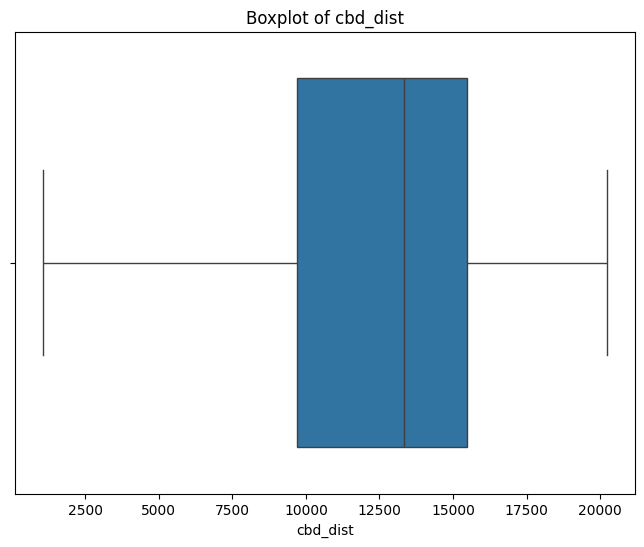

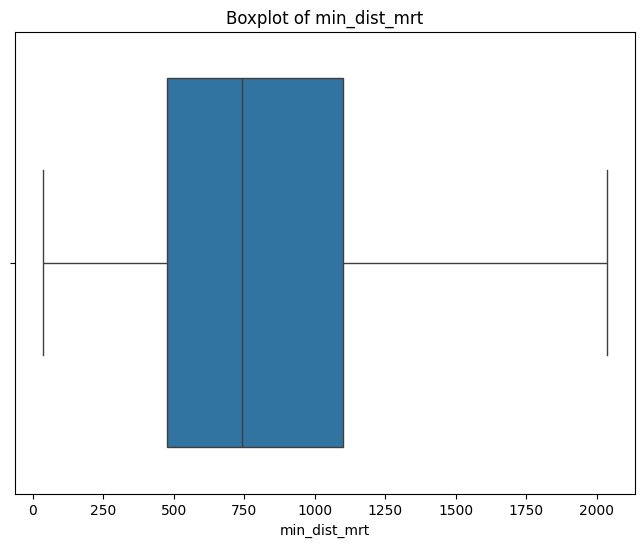

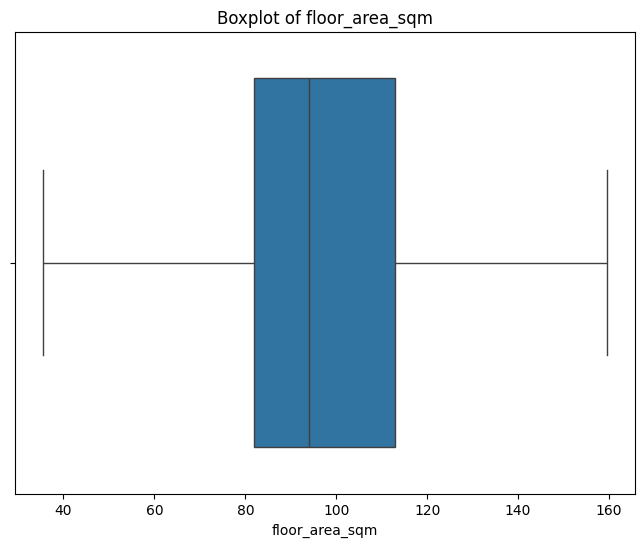

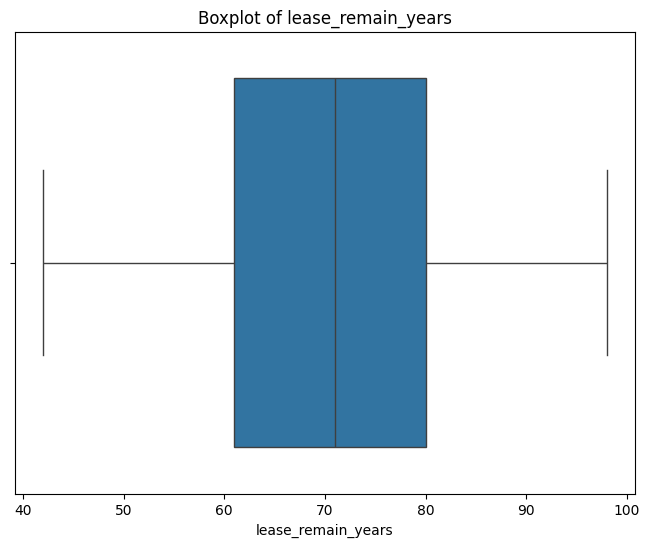

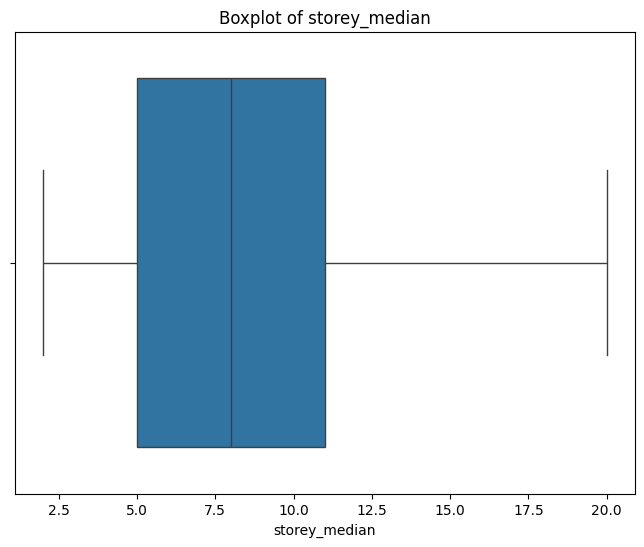

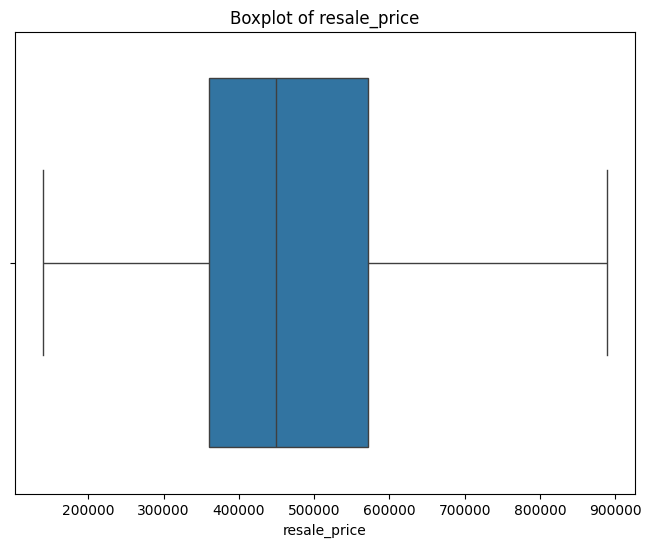

In [26]:
box = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']
for i in box:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=flat_df_1,x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

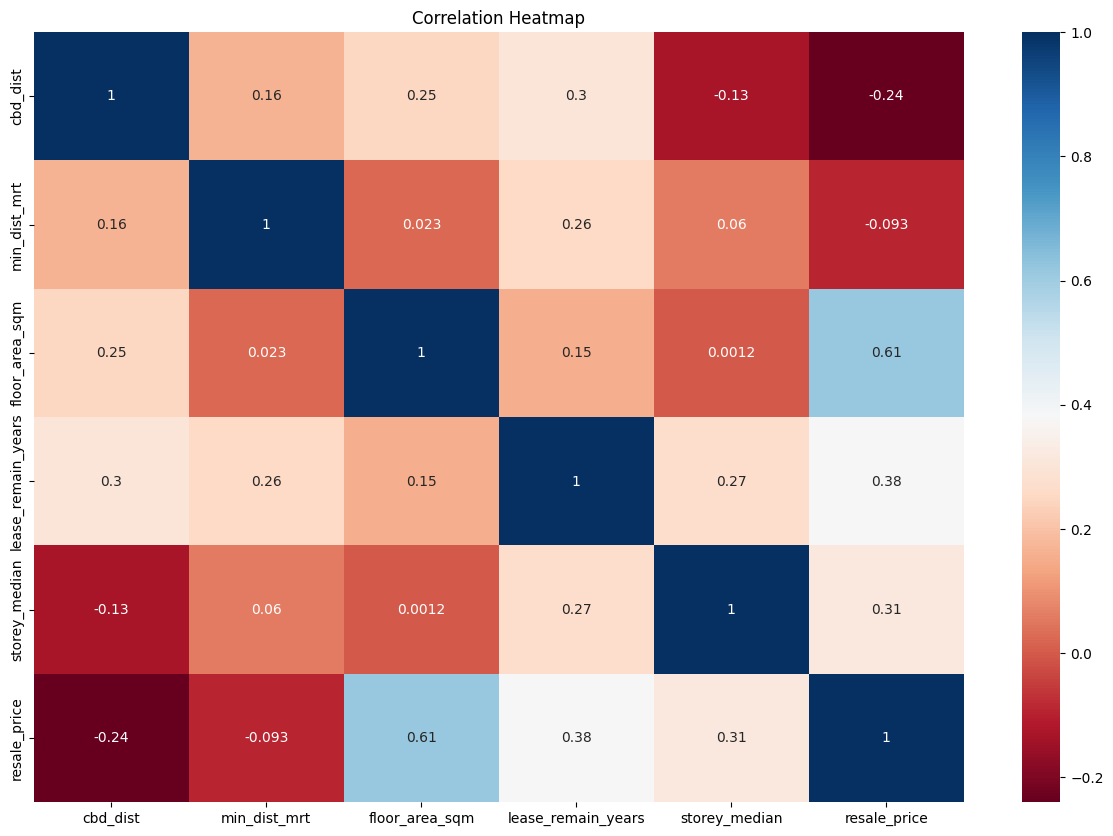

In [27]:
corrMatrix = flat_df_1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

# Bulid the Model

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X = flat_df_1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']] # actual value
y = flat_df_1[['resale_price']] # traget value

In [30]:
y.value_counts()

resale_price
888500.00       4888
400000.00       2459
450000.00       2453
380000.00       2402
420000.00       2390
                ... 
473388.00          1
473128.00          1
472889.00          1
471800.00          1
488888.88          1
Name: count, Length: 3490, dtype: int64

In [31]:
# To normalizing  the encoded data
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [32]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.488420,0.604627,-1.574454,-0.667895,-0.078176
1,-0.488420,0.604627,-1.574454,-0.667895,0.525448
2,-0.488420,0.604627,-1.196266,-0.667895,-0.681800
3,-0.488420,0.604627,-2.204768,-0.667895,-0.078176
4,-0.488420,0.604627,-1.532433,-0.667895,-0.681800
...,...,...,...,...,...
200604,0.725454,2.561639,-2.120726,1.774068,0.525448
200605,0.725454,2.561639,-0.187764,1.774068,-0.078176
200606,0.523283,0.994958,-0.187764,1.848066,-0.681800
200607,0.578847,1.371635,0.652655,1.848066,-0.078176


In [33]:
# This are pre model spliting and  model score basices need this..
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
# This are model choosing part to import him..
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [34]:
# first train and test split him
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Building DecisionTreeRegressor Model

In [35]:
dtr = DecisionTreeRegressor()

In [36]:
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [37]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 3}


In [38]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [40]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R-Squared: ",r2)

Mean Squared Error:  3690877063.404118
Mean Absolute Error:  46521.34304952606
Root Mean Squared Error:  60752.58894404516
R-Squared:  0.8535282777957313


In [41]:
grid_search.score(X_train,y_train)

0.8862346910299406

In [42]:
grid_search.score(X_test,y_test)

0.8535282777957313

# Building Linear Regression model

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [44]:
# Let check the intercept for the model
inter = regression_model.intercept_[0]
print("The intercept for our model is {}".format(inter))

The intercept for our model is 481286.9323740654


In [45]:
regression_model.score(X_train,y_train)

0.7482102560154323

In [46]:
regression_model.score(X_test,y_test)

0.7485747627787074

In [47]:
# X = flat_df_1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']] # actual value
# y = flat_df_1[['resale_price']]

In [48]:
mse_linear = np.mean((regression_model.predict(X_test)-y_test)**2)

In [49]:
import math
print("Root Mean Squared Error: %.3f" % math.sqrt(mse))

Root Mean Squared Error: 60752.589


In [50]:
y_pred = regression_model.predict(X_test)

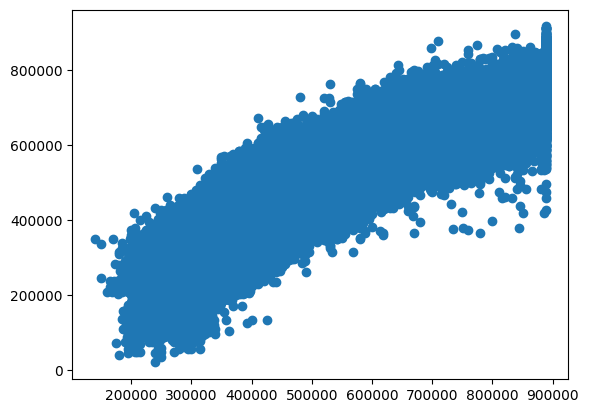

In [51]:
plt.scatter(y_test['resale_price'],y_pred)

In [52]:
from scipy.stats import zscore

X_train_scaled  = zscore(X_train)
X_test_scaled = zscore(X_test)
y_train_scaled = zscore(y_train)
y_test_scaled = zscore(y_test)

In [53]:
regression_model_linear = LinearRegression()
regression_model_linear.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [54]:
intercept = regression_model_linear.intercept_[0]
intercept

4.185723720575197e-16

In [55]:
regression_model_linear.score(X_test_scaled,y_test_scaled)

0.7485670503450743

In [56]:
regression_model_linear.score(X_train_scaled,y_train_scaled)

0.7482102560154322

In [57]:
mse_linear = np.mean((regression_model_linear.predict(X_test_scaled)-y_test_scaled)**2)

In [58]:
math.sqrt(mse_linear)

0.5014309021738945

In [59]:
y_pred_linear = regression_model_linear.predict(X_test_scaled)

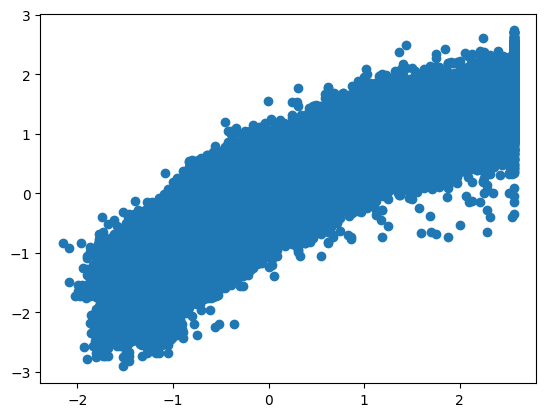

In [60]:
plt.scatter(y_test_scaled['resale_price'],y_pred_linear)

# Building Randomforest model 

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=64)
random_forest_Regressor = RandomForestRegressor(n_estimators=600,oob_score=True)
random_forest_Regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600, oob_score=True)

In [62]:
oob_score = random_forest_Regressor.oob_score_
print("OOB score : " ,oob_score)

oob_error = 1- random_forest_Regressor.oob_score_
print("OOB score : ",oob_error)

OOB score :  0.8585248684477886
OOB score :  0.14147513155221136


In [63]:
y_train_pric = random_forest_Regressor.predict(X_train)
y_test_pric = random_forest_Regressor.predict(X_test)

In [64]:
random_forest_Regressor.score(X_train,y_train)

0.9461520128700833

In [65]:
random_forest_Regressor.score(X_test,y_test)

0.8628578979263519

In [66]:
# Create an instance of each regression model
LR_model = LinearRegression()
DT_model = DecisionTreeRegressor()

# Train the models
LR_model.fit(X_train, y_train)
DT_model.fit(X_train, y_train)

# Make predictions on the test set
RFR_preds = random_forest_Regressor.predict(X_test)
LR_preds = LR_model.predict(X_test)
DT_preds = DT_model.predict(X_test)

# Evaluate the models

RFR_mse = mean_squared_error(y_test, RFR_preds)
RFR_mae = mean_absolute_error(y_test, RFR_preds)
RFR_r2 = r2_score(y_test, RFR_preds)

LR_mse = mean_squared_error(y_test, LR_preds)
LR_mae = mean_absolute_error(y_test, LR_preds)
LR_r2 = r2_score(y_test, LR_preds)

dt_mse = mean_squared_error(y_test, DT_preds)
dt_mae = mean_absolute_error(y_test, DT_preds)
dt_r2 = r2_score(y_test, DT_preds)

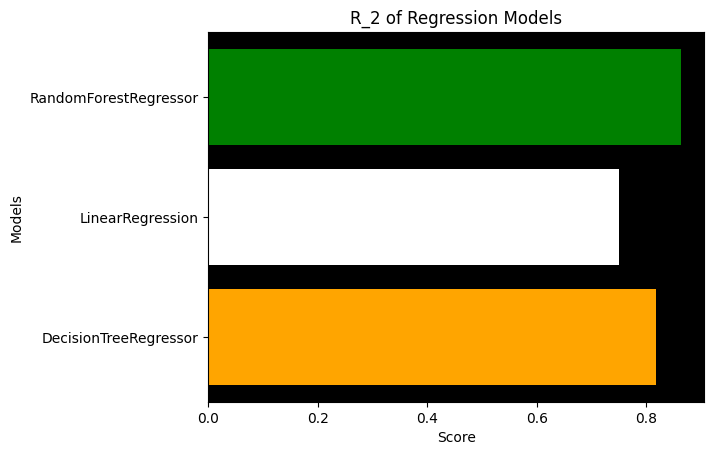

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

DecisionTreeRegressor 0.8169962136264495
LinearRegression 0.7495920484386354
RandomForestRegressor 0.8628578979263519


In [69]:
import matplotlib.pyplot as plt

models = ['DecisionTreeRegressor', 'LinearRegression', 'RandomForestRegressor']
score = [dt_r2, LR_r2, RFR_r2]

# Specify three different colors
colors = ['orange', 'white', 'green']

fig, ax = plt.subplots()

ax.barh(models, score, color=colors)
ax.set_xlabel('Score')
ax.set_ylabel('Models')
ax.set_title('R_2 of Regression Models')

# Set the background color to black
ax.set_facecolor('black')

plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model


In [68]:
print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")


Model: RandomForestRegressor contain Maximum R2_Score: 0.8628578979263519 


In [70]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = Scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

inf